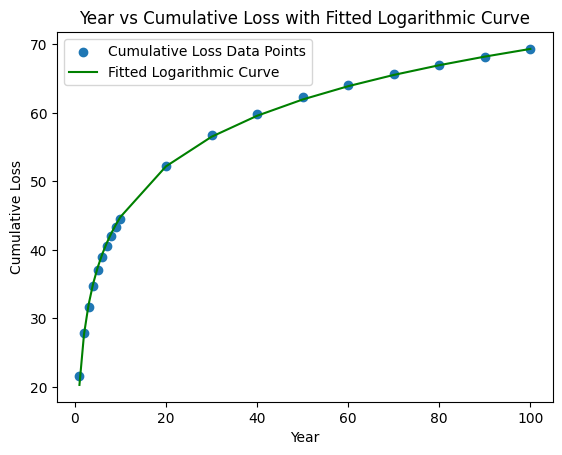

Fitted logarithmic parameters: [10.65631408 20.2764022 ]


In [ ]:
import pandas as pd
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt

#  Define the exponential model function to fit
def exp_model_func(x, a, b, c):
    return a * np.exp(b * x) + c

def log_model_func(x, a, b):
    return a * np.log(x) + b

# Read the operational data from a CSV file
data = pd.read_csv('C:/Users/extaxha/Documents/project_data/estimated_loss.csv')

year = data['year']
loss = data['loss']

# Convert cumulative loss to non-cumulative loss
non_cumulative_loss = np.diff(loss, prepend=0)

# Fit the logarithmic model to the data
log_params, log_params_covariance = curve_fit(log_model_func, year, loss, p0=[15, 0])

# Plot the fitted logarithmic curve along with the data points
plt.scatter(year, loss, label='Cumulative Loss Data Points')
plt.plot(year, log_model_func(year, *log_params), color='green', label='Fitted Logarithmic Curve')
plt.xlabel('Year')
plt.ylabel('Cumulative Loss')
plt.title('Year vs Cumulative Loss with Fitted Logarithmic Curve')
plt.legend()
plt.show()

print("Fitted logarithmic parameters:", log_params)



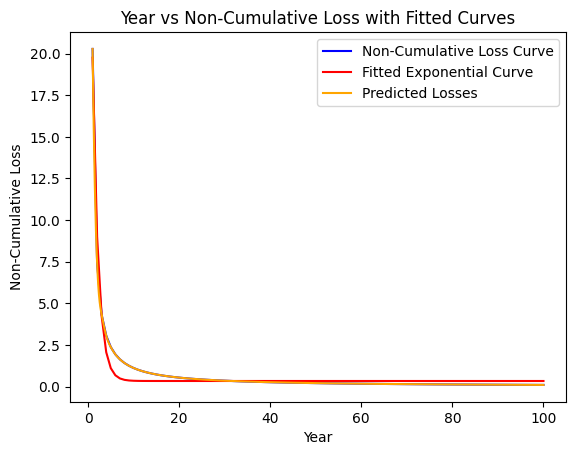

Fitted exponential parameters: [43.50079614 -0.80698262  0.34301349]


In [3]:
from scipy.interpolate import UnivariateSpline
# Calculate the non-cumulative loss using the fitted logarithmic model
years = np.arange(1, 101)
fitted_cumulative_loss = log_model_func(years, *log_params)
non_cumulative_loss = np.diff(fitted_cumulative_loss, prepend=0)

# Fit the exponential model to the fitted non-cumulative loss data
exp_params, exp_params_covariance = curve_fit(exp_model_func, years, non_cumulative_loss, p0=[1, -0.5, 1])


# Fit a smooth spline to the data
spline = UnivariateSpline(years, non_cumulative_loss, s=0)  # s=0 means interpolation through all points (no smoothing)

# Generate predictions for fractional years (monthly, e.g., 1.0, 1.083, 1.167, ..., 100)
fractional_years = np.linspace(1, 100, 1200)
predicted_losses = spline(fractional_years)

# Plot the fitted non-cumulative loss curve and the fitted exponential curve along with the data points
plt.plot(years, non_cumulative_loss, color='blue', label='Non-Cumulative Loss Curve')
plt.plot(years, exp_model_func(years, *exp_params), color='red', label='Fitted Exponential Curve')
plt.plot(fractional_years, predicted_losses, label='Predicted Losses', color='orange')
plt.xlabel('Year')
plt.ylabel('Non-Cumulative Loss')
plt.title('Year vs Non-Cumulative Loss with Fitted Curves')
plt.legend()
plt.show()

print("Fitted exponential parameters:", exp_params)


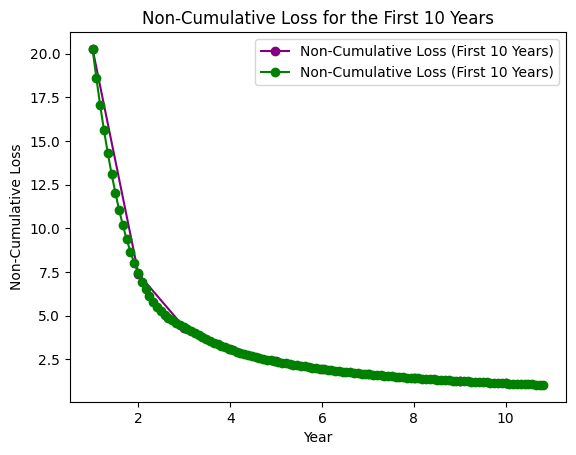

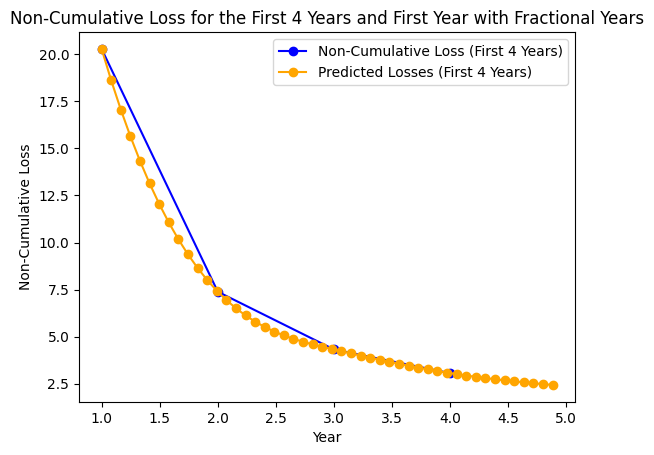

In [4]:

# Plot the first ten years of non-cumulative loss
plt.plot(years[:10], non_cumulative_loss[:10], marker='o', linestyle='-', color='purple', label='Non-Cumulative Loss (First 10 Years)')
plt.plot(fractional_years[:10*12], predicted_losses[:10*12], marker='o', linestyle='-', color='green', label='Non-Cumulative Loss (First 10 Years)')
plt.xlabel('Year')
plt.ylabel('Non-Cumulative Loss')
plt.title('Non-Cumulative Loss for the First 10 Years')
plt.legend()
plt.show()

# Plot the first four years of non-cumulative loss
plt.plot(years[:4], non_cumulative_loss[:4], marker='o', linestyle='-', color='blue', label='Non-Cumulative Loss (First 4 Years)')
plt.plot(fractional_years[:4*12], predicted_losses[:4*12], marker='o', linestyle='-', color='orange', label='Predicted Losses (First 4 Years)')

plt.xlabel('Year')
plt.ylabel('Non-Cumulative Loss')
plt.title('Non-Cumulative Loss for the First 4 Years and First Year with Fractional Years')
plt.legend()
plt.show()

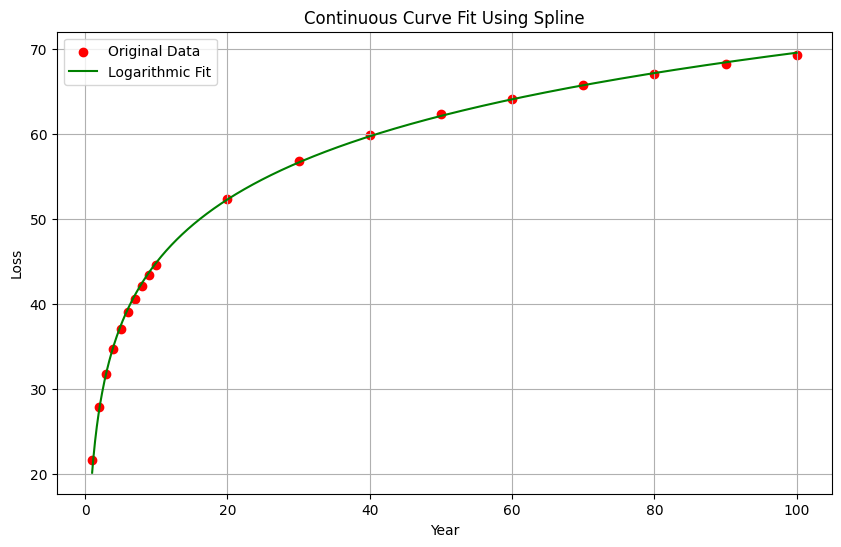

Fitted logarithmic parameters: [10.728643   20.11340233]


In [5]:
from scipy.interpolate import UnivariateSpline


# Your data (years and corresponding losses)
years = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
losses = np.array([21.6, 27.8, 31.7, 34.7, 37, 39, 40.6, 42.1, 43.4, 44.5, 52.3, 56.8, 59.9, 62.3, 64.1, 65.7, 67, 68.2, 69.3])

# Fit a smooth spline to the data
spline = UnivariateSpline(years, losses, s=0)  # s=0 means interpolation through all points (no smoothing)

# Generate predictions for fractional years (monthly, e.g., 1.0, 1.083, 1.167, ..., 100)
fractional_years = np.linspace(1, 100, 1200)
predicted_losses = spline(fractional_years)

log_params, log_params_covariance = curve_fit(log_model_func, fractional_years, predicted_losses, p0=[1, 1])
loss = log_model_func(fractional_years, *log_params)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(years, losses, color='red', label='Original Data')
plt.plot(fractional_years, loss, label='Logarithmic Fit', color='green')
plt.xlabel('Year')
plt.ylabel('Loss')
plt.title('Continuous Curve Fit Using Spline')
plt.legend()
plt.grid(True)
plt.show()

print("Fitted logarithmic parameters:", log_params)


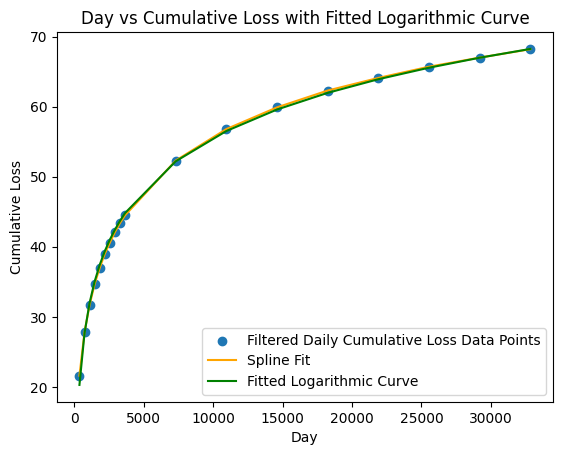

Fitted logarithmic parameters for filtered data: [ 10.66381105 -42.66052307]


In [6]:
from scipy.stats import linregress

# Normalize the daily non-cumulative loss to ensure the integral over the first year equals the first entry in the data
#daily_non_cumulative_loss *= loss.iloc[0] / np.sum(daily_non_cumulative_loss[:365])

# Calculate the daily cumulative loss
daily_time = np.arange(1, 365*100+1)
daily_cum_loss = np.zeros(365*100)

# Get the index for the first 10 years, then every tenth year
yearly_indices = np.concatenate((np.arange(365, 365*10+1, 365), np.arange(365*20, len(daily_cum_loss), 365*10)))
yearly_indices = np.insert(yearly_indices, 0, 1)

# Insert starting value due to log-fit
losses_copy = np.insert(losses, 0, 0.1)

# Insert the yearly loss values into the daily cumulative loss array
for i, idx in enumerate(yearly_indices):
    daily_cum_loss[idx] = losses_copy[i]

# Remove zero values from daily_cum_loss for fitting
non_zero_indices = daily_cum_loss > 0
filtered_daily_cum_loss = daily_cum_loss[non_zero_indices]
filtered_daily_time = daily_time[non_zero_indices]


# Fit the logarithmic model to the filtered data
# Remove the first non-zero value from the filtered data
filtered_daily_cum_loss = filtered_daily_cum_loss[1:]
filtered_daily_time = filtered_daily_time[1:]
log_params_filtered, log_params_covariance_filtered = curve_fit(log_model_func, filtered_daily_time, filtered_daily_cum_loss, p0=[1, 1])

# Fit a smooth spline to the filtered data
spline_filtered = UnivariateSpline(filtered_daily_time, filtered_daily_cum_loss, s=0)  # s=0 means interpolation through all points (no smoothing)

# Generate predictions for daily time using the spline
predicted_spline_loss = spline_filtered(filtered_daily_time)

# Calculate the fitted logarithmic curve using the filtered data
fitted_log_curve = log_model_func(filtered_daily_time, *log_params_filtered)

# Plot the fitted logarithmic curve along with the filtered data points
plt.scatter(filtered_daily_time, filtered_daily_cum_loss, label='Filtered Daily Cumulative Loss Data Points')
plt.plot(filtered_daily_time, predicted_spline_loss, color='orange', label='Spline Fit')
plt.plot(filtered_daily_time, fitted_log_curve, color='green', label='Fitted Logarithmic Curve')

plt.xlabel('Day')
plt.ylabel('Cumulative Loss')
plt.title('Day vs Cumulative Loss with Fitted Logarithmic Curve')
plt.legend()
plt.show()

print("Fitted logarithmic parameters for filtered data:", log_params_filtered)



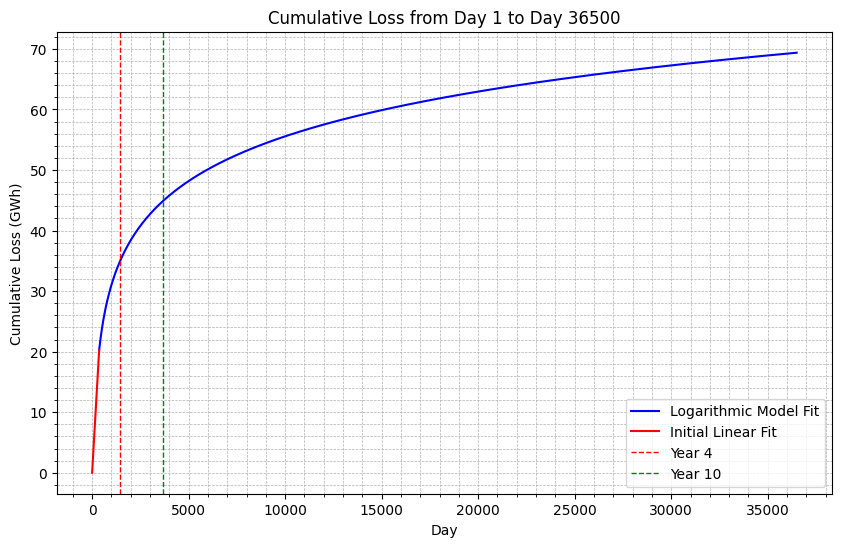

In [7]:
# Generate days from 1 to 365
# Generate days from 1 to 36500 (100 years)
days = np.arange(365, 365*100+1)
firt_year = np.arange(1, 365+1)

# Calculate the cumulative loss using the logarithmic model with filtered parameters
cumulative_loss_days = log_model_func(days, *log_params_filtered)

# Linear fit from 0 to the first entry of "loss" for the first 365 days
linear_fit = np.linspace(0, cumulative_loss_days[0], 365)
daily_cum_loss[:365] = linear_fit

# Plot the cumulative loss from day 1 to day 36500
plt.figure(figsize=(10, 6))
plt.plot(days, cumulative_loss_days, label='Logarithmic Model Fit', color='blue')
plt.plot(firt_year, daily_cum_loss[:365], label='Initial Linear Fit', color='red')
plt.axvline(x=4*365, color='red', linestyle='--', linewidth=1, label='Year 4')
plt.axvline(x=10*365, color='green', linestyle='--', linewidth=1, label='Year 10')
plt.xlabel('Day')
plt.ylabel('Cumulative Loss (GWh)')
plt.title('Cumulative Loss from Day 1 to Day 36500')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.minorticks_on()
plt.show()

result_loss = np.concatenate((daily_cum_loss[:365], cumulative_loss_days))




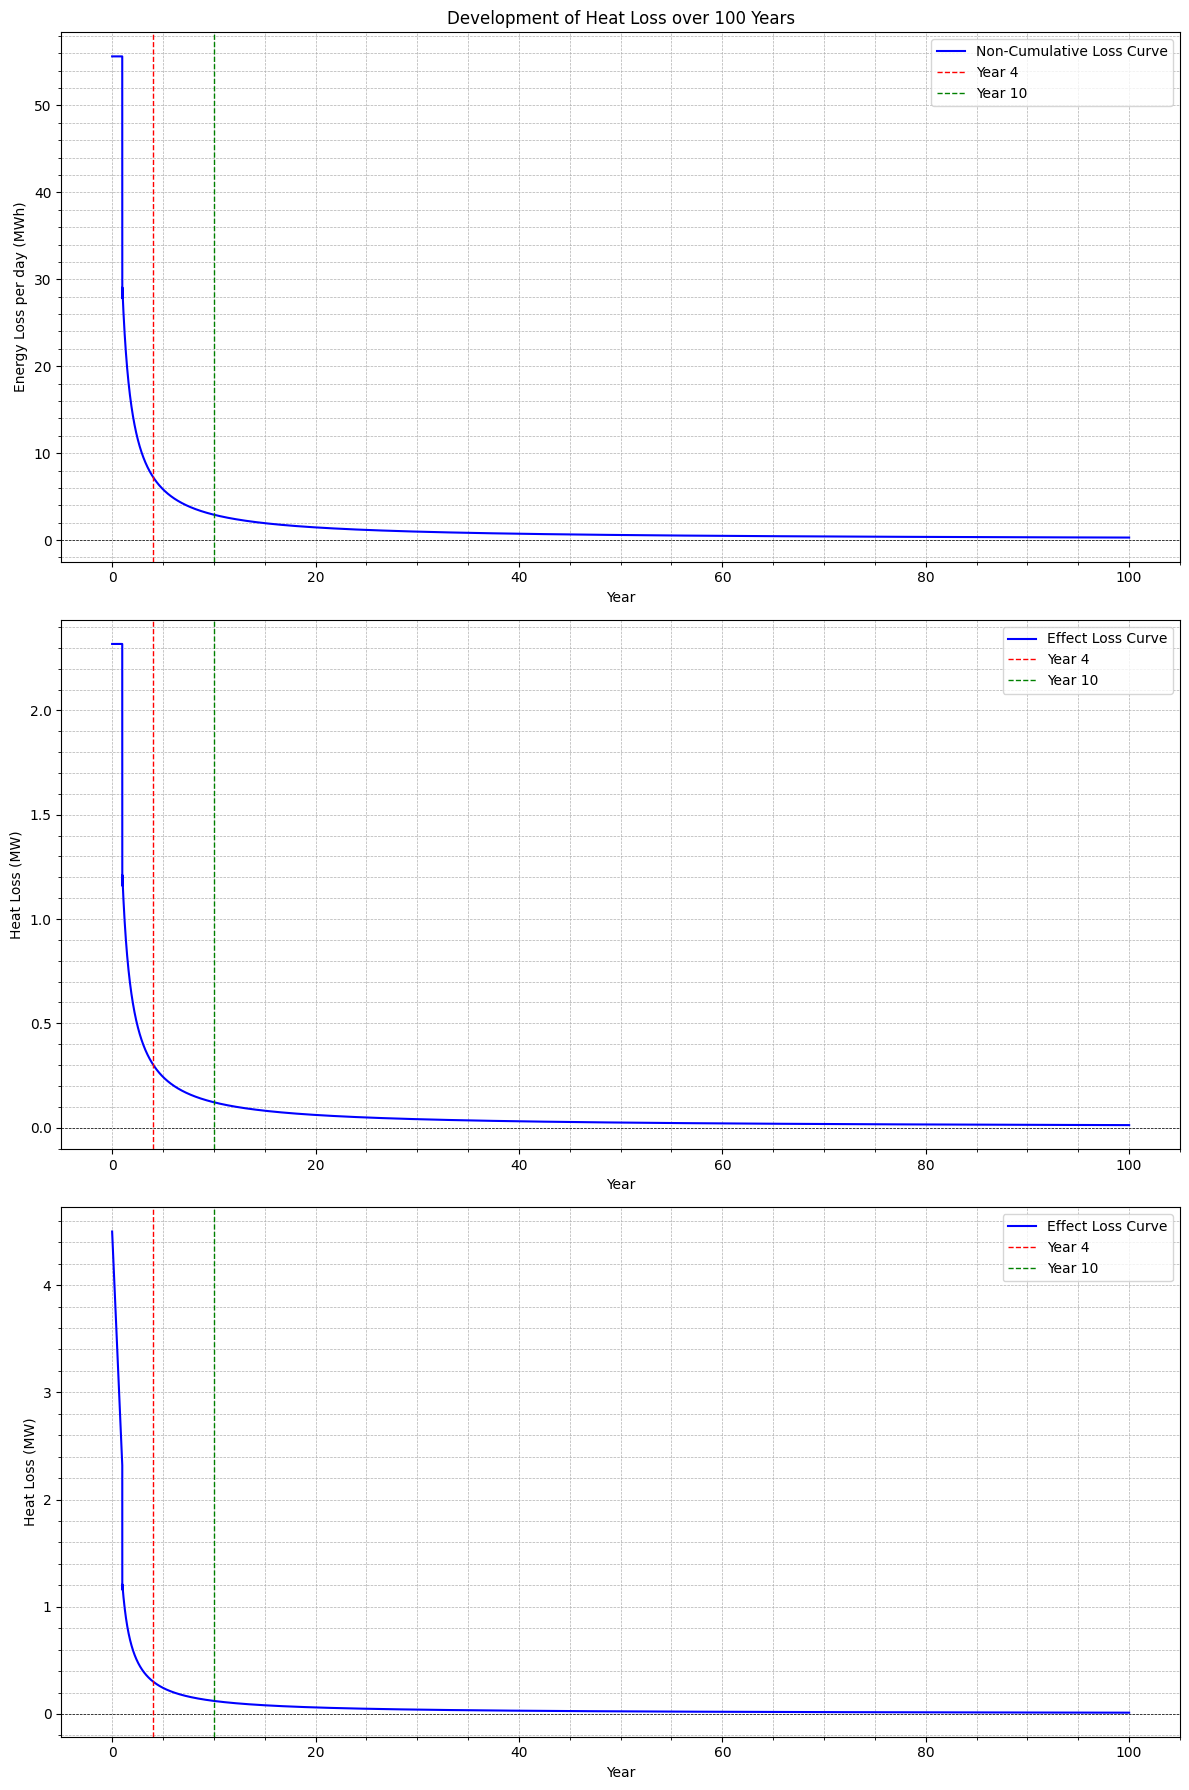

In [8]:
# Define all days
dayss = np.arange(1, 365*100+2)

# Calculate the non-cumulative loss, and GWh to MWh
non_cumulative_loss_results = 1000 * np.diff(result_loss, prepend=0)
non_cumulative_loss_results = 1000 * np.gradient(result_loss,dayss)

# replace some values for better visualization
non_cumulative_loss_results[0] = non_cumulative_loss_results[1]
non_cumulative_loss_results[365] = non_cumulative_loss_results[364]

# Fit the exponential model to the fitted non-cumulative loss data
#exp_params, exp_params_covariance = curve_fit(exp_model_func, dayss[365:], non_cumulative_loss_results[365:], p0=[1, -0.01, 1])
#plt.plot(dayss[365:], exp_model_func(dayss[365:], *exp_params), color='red', label='Fitted Exponential Curve')
#print("Fitted exponential parameters:", exp_params)

# Convert days to years for x-axis
years_axis = dayss / 365

# Calculate the effect losses assuming constant effect for one day
effect_losses = non_cumulative_loss_results / 24 

# This is to make it more realistic with starting value
effect_losses_lin = np.copy(effect_losses)
linear_fit = np.linspace(4.5, effect_losses[0], 365)
effect_losses_lin[:365] = linear_fit

# Plot the non-cumulative loss, effect loss, and effect loss with linear fit verticallys with linear fit verticallys with linear fit vertically
fig, axs = plt.subplots(3, 1, figsize=(12, 18))

# Plot the non-cumulative loss
axs[0].plot(years_axis, non_cumulative_loss_results, color='blue', label='Non-Cumulative Loss Curve')
axs[0].axhline(0, color='black', linewidth=0.5, linestyle='--')
axs[0].axvline(x=4, color='red', linestyle='--', linewidth=1, label='Year 4')
axs[0].axvline(x=10, color='green', linestyle='--', linewidth=1, label='Year 10')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Energy Loss per day (MWh)')
axs[0].set_title('Development of Heat Loss over 100 Years')
axs[0].legend()
axs[0].grid(True, which='both', linestyle='--', linewidth=0.5)
axs[0].minorticks_on()

# Plot the effect losses
axs[1].plot(years_axis, effect_losses, color='blue', label='Effect Loss Curve')
axs[1].axhline(0, color='black', linewidth=0.5, linestyle='--')
axs[1].axvline(x=4, color='red', linestyle='--', linewidth=1, label='Year 4')
axs[1].axvline(x=10, color='green', linestyle='--', linewidth=1, label='Year 10')
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Heat Loss (MW)')
axs[1].legend()
axs[1].grid(True, which='both', linestyle='--', linewidth=0.5)
axs[1].minorticks_on()

# Plot the effect losses
axs[2].plot(years_axis, effect_losses_lin[:len(years_axis)], color='blue', label='Effect Loss Curve')
axs[2].axhline(0, color='black', linewidth=0.5, linestyle='--')
axs[2].axvline(x=4, color='red', linestyle='--', linewidth=1, label='Year 4')
axs[2].axvline(x=10, color='green', linestyle='--', linewidth=1, label='Year 10')
axs[2].set_xlabel('Year')
axs[2].set_ylabel('Heat Loss (MW)')
axs[2].legend()
axs[2].grid(True, which='both', linestyle='--', linewidth=0.5)
axs[2].minorticks_on()

plt.tight_layout()
plt.show()

In [9]:
tot_loss = sum(effect_losses)*24/1000
print("Total loss over 100 years:", tot_loss, "GWh")


Total loss over 100 years: 69.40473563163783 GWh


0.652
0.7107029258758458
0.652


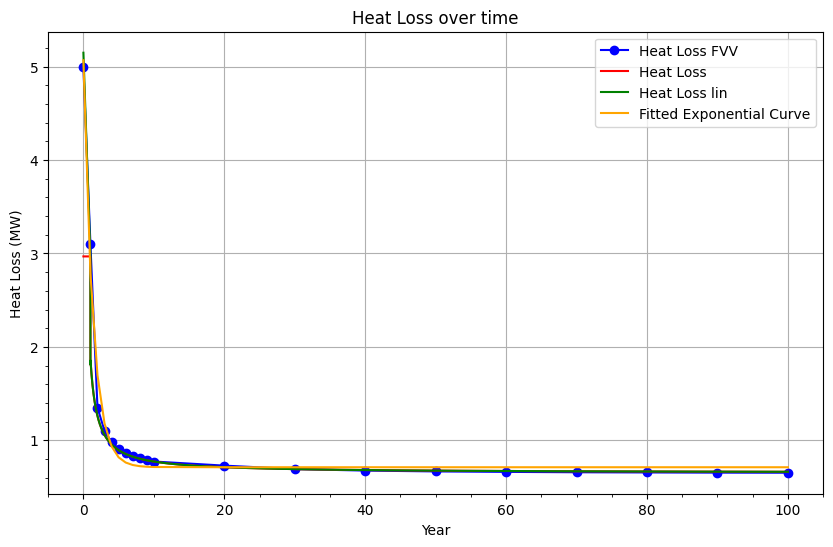

In [ ]:
# Read the operational data from a CSV file
data_power = pd.read_csv('C:/Users/extaxha/Documents/vscode/heat-storage-model/data/estimated_power_loss.csv')
starting_value = pd.DataFrame({'year': [0], 'loss': [5]})
data_power = pd.concat([starting_value, data_power], ignore_index=True)

year = data_power['year']
heat_loss = data_power['loss']

contineous_heat_loss = 0.65 # 6.4% of 100GWh from report

exp_params_heat_loss, exp_params_covariance_heat_loss = curve_fit(exp_model_func, year, heat_loss, p0=[1, -0.1, 1])
print(exp_model_func(year, *exp_params_heat_loss).iloc[-1])
print(heat_loss.iloc[-1])

plt.figure(figsize=(10, 6))
plt.plot(year, heat_loss, marker='o', linestyle='-', color='blue', label='Heat Loss FVV')
plt.plot(years_axis, contineous_heat_loss+effect_losses[:len(years_axis)], linestyle='-', color='red', label='Heat Loss')
plt.plot(years_axis, contineous_heat_loss+effect_losses_lin[:len(years_axis)], linestyle='-', color='green', label='Heat Loss lin')
plt.plot(year, exp_model_func(year, *exp_params_heat_loss), color='orange', label='Fitted Exponential Curve')
plt.xlabel('Year')
plt.ylabel('Heat Loss (MW)')
plt.title('Heat Loss over time')
plt.legend()
plt.grid(True)
plt.minorticks_on()
plt.show()

This suggests from the report that each year has a constant power of 0.65 MW loss for keeping the mountain warm (not warming it up). This number stems from that the storage are assumed to work with 100 GWh per year, meaning a 6.4% loss. Another 

Fitted parameters: [ 4.3583966  -0.74263591  0.71070289]
RMSE: 0.12146414424320419
R-squared: 0.9862090355075808
876000


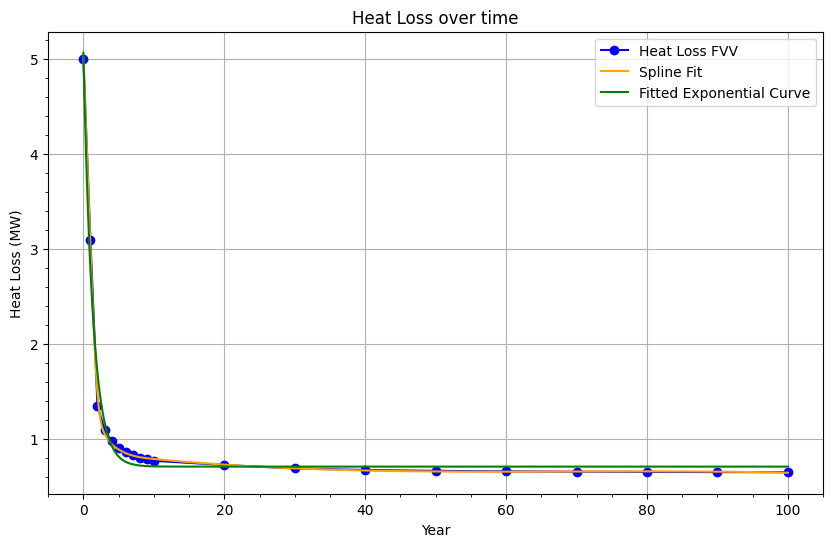

In [27]:
from scipy.optimize import curve_fit
from scipy.optimize import differential_evolution
import warnings

def func(x, a, b, c):
    return a * np.exp(b * x) + c

# function for genetic algorithm to minimize (sum of squared error)
def sumOfSquaredError(parameterTuple):
    warnings.filterwarnings("ignore") # do not print warnings by genetic algorithm
    val = func(xData, *parameterTuple)
    return np.sum((yData - val) ** 2.0)

# generate initial parameter values
def generate_Initial_Parameters():
    """Initial parameter generation. """
    parameterBounds = []
    parameterBounds.append([0.0, 100.0]) # search bounds for a
    parameterBounds.append([-10.0, 0.0]) # search bounds for b
    parameterBounds.append([0.0, 10.0]) # search bounds for c

    # "seed" the numpy random number generator for repeatable results
    result = differential_evolution(sumOfSquaredError, parameterBounds, seed=3)
    return result.x

def exponential_model(xData,yData):
    """Logistical model. """
    # by default, differential_evolution completes by calling curve_fit() using parameter bounds
    geneticParameters = generate_Initial_Parameters()

    # now call curve_fit without passing bounds from the genetic algorithm,
    # just in case the best fit parameters are aoutside those bounds
    fittedParameters, pcov = curve_fit(func, xData, yData, geneticParameters)
    print('Fitted parameters:', fittedParameters)

    modelPredictions = func(xData, *fittedParameters) 

    absError = modelPredictions - yData

    SE = np.square(absError) # squared errors
    MSE = np.mean(SE) # mean squared errors
    RMSE = np.sqrt(MSE) # Root Mean Squared Error, RMSE
    Rsquared = 1.0 - (np.var(absError) / np.var(yData))
    
    # create data for the fitted equation plot
    hourly_data_points = 100*365*24
    xModel = np.linspace(min(xData), max(xData),hourly_data_points)
    yModel = func(xModel, *fittedParameters)

    print('RMSE:', RMSE)
    print('R-squared:', Rsquared)

    return yModel, xModel


# Generate predictions for more data points using the spline, one datapoint per month
more_data_points = 1200
fractional_years = np.linspace(min(year), max(year), more_data_points)

# Fit a smooth spline to the filtered data
spline_filtered = UnivariateSpline(year, heat_loss, s=0.03)  # s=0 means interpolation through all points (no smoothing)
predicted_spline_loss = spline_filtered(fractional_years)

# Calculate the fitted logarithmic curve using the filtered data
xData = year
yData = heat_loss
y_fit, x_fit = exponential_model(xData, yData)

print(len(y_fit))

plt.figure(figsize=(10, 6))
plt.plot(year, heat_loss, marker='o', color='blue', label='Heat Loss FVV')
plt.plot(fractional_years, predicted_spline_loss, color='orange', label='Spline Fit') 
plt.plot(x_fit, y_fit, color='green', label='Fitted Exponential Curve') 
plt.legend()
plt.xlabel('Year')
plt.ylabel('Heat Loss (MW)')
plt.title('Heat Loss over time')
plt.grid(True)
plt.minorticks_on()
plt.show()

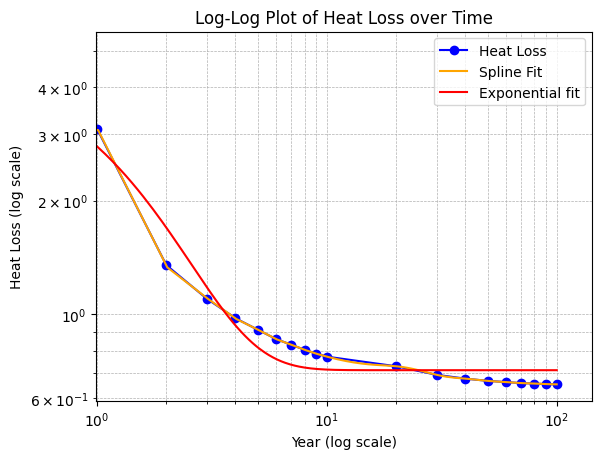

In [ ]:
# Log curve
plt.plot(data_power['year'], data_power['loss'], marker='o', linestyle='-', color='blue', label='Heat Loss')
plt.plot(fractional_years, predicted_spline_loss, linestyle='-', color='orange', label='Spline Fit')
plt.plot(x_fit, y_fit, linestyle='-', color='red', label='Exponential fit')
plt.yscale('log')
plt.xscale('log')
plt.xlim(0.99, None)  # Set x-axis to start from zero
plt.xlabel('Year (log scale)')
plt.ylabel('Heat Loss (log scale)')
plt.title('Log-Log Plot of Heat Loss over Time')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.minorticks_on()
plt.show()